# Assignment 3
The objective of this assignment is to get you familiarize with `AutoEncoders`.

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Note
- Code snippets are in ``Pytorch``. If you are comfortable with ``Keras`` feel free to use it. No restrictions on the frameworks

## Datasets 
- CIFAR10

## Packages Used
- Pytorch 
- Refer this link to get familiarity with pytorch and CIFAR10 dataset[link](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment3_Q2.ipynb`.

## Question 2 : Autoencoders


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

### Load CIFAR 10 Dataset

In [3]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print("Train Data shape:", trainset.data.shape)
print("Test Data shape:", testset.data.shape)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Train Data shape: (50000, 32, 32, 3)
Test Data shape: (10000, 32, 32, 3)


In [4]:
trainset.data.shape

(50000, 32, 32, 3)

In [5]:
trainloader.batch_size

16


### Visualize the Data

torch.Size([16, 3, 32, 32])
torch.Size([16])


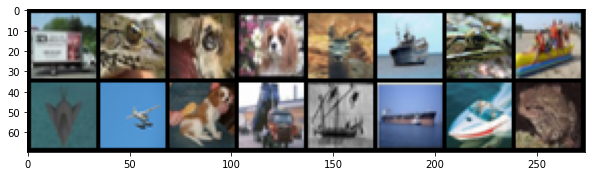

In [6]:
def imshow(img):
    img = img #/ 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    # plt.imshow(npimg)
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# images = np.transpose(images,(0,2,3,1))
print(images.shape)
print(labels.shape)

# show images
imshow(torchvision.utils.make_grid(images))

### Define Model
Refer ``` torch.nn ``` [link](https://pytorch.org/docs/stable/nn.html) 

Experiment with different architectures of encoder and decoder i.e
- encoder and decoder is fully connected layers
- encoder and decoder is combination of convolution layers + fully connected layers
- encoder and decoder is fully convolutional layers.

##Fully Connected!

In [7]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
            nn.Linear(3072,1024),
            nn.ReLU(),
            nn.Linear(1024,256),
            nn.ReLU(),
            nn.Linear(256,64),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            # Write your code here
            nn.Linear(64,256),
            nn.ReLU(),
            nn.Linear(256,1024),
            nn.ReLU(),
            nn.Linear(1024,3072),
            nn.Sigmoid(),
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [8]:
def print_model(encoder, decoder):
    print("############## Encoder ##############")
    print(encoder)
    print("############## Decoder ##############")
    print(decoder)
    print("")

def create_model():
  autoencoder = Autoencoder()
  print_model(autoencoder.encoder, autoencoder.decoder)
  return autoencoder

#### Loss and Optimizer

In [9]:
autoencoder = create_model()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

############## Encoder ##############
Sequential(
  (0): Linear(in_features=3072, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=64, bias=True)
  (5): ReLU()
)
############## Decoder ##############
Sequential(
  (0): Linear(in_features=64, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=1024, bias=True)
  (3): ReLU()
  (4): Linear(in_features=1024, out_features=3072, bias=True)
  (5): Sigmoid()
)



### Training

In [ ]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			# inputs = torch.permute(inputs,(0,2,3,1))
			inputs = Variable(inputs)
			# print("Inputs Shape:",inputs.shape,type(inputs))
			inputs = inputs.reshape(16,3072)
			# ============ Forward ============
			encoded, outputs = autoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(autoencoder.state_dict(), "autoencoder.pt")

[1,  2000] loss: 0.029
[2,  2000] loss: 0.021
[3,  2000] loss: 0.019
[4,  2000] loss: 0.018
[5,  2000] loss: 0.017
[6,  2000] loss: 0.016
[7,  2000] loss: 0.016
[8,  2000] loss: 0.016
[9,  2000] loss: 0.016
[10,  2000] loss: 0.016
Finished Training
Saving Model...


### Load the saved model and Reconstruct the image

In [10]:
autoencoder.load_state_dict(torch.load("/content/autoencoder.pt"))

<All keys matched successfully>

#### Provide Qualitative Results and Aanlysis with different encoder and decoder architectures as mentioned above.

GroundTruth:    cat  ship  ship plane  frog


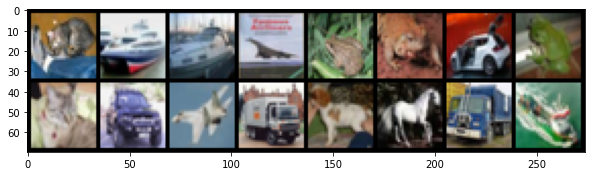

torch.Size([16, 3, 32, 32])
Reconstructed image
torch.Size([16, 3072])


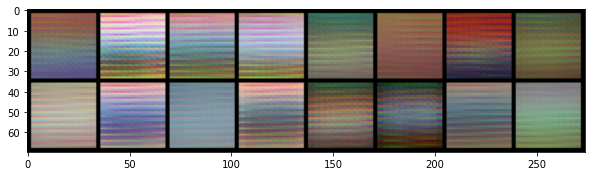

In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images)
print(images.shape)
print("Reconstructed image")
decoded_imgs = autoencoder(images.reshape(16,3072))[1]
print(decoded_imgs.size())
imshow(torchvision.utils.make_grid(decoded_imgs.data.reshape(16,3,32,32)))

##Convolution layers + Fully Connected Layer

In [12]:
class Autoencoder_f(torch.nn.Module):
  def __init__(self):
    super(Autoencoder_f,self).__init__()
    self.encoder = torch.nn.Sequential(
        nn.Conv2d(3, 8, 4, stride=2,padding=1), #[batch,8,16,16]
        nn.ReLU(),
        nn.Conv2d(8, 4, 4, stride=2,padding=1), #[batch,4,8,8]
        nn.Flatten(),
        nn.Linear(256,64),
        nn.ReLU(),
        nn.Linear(64,16),
        nn.ReLU(),
    )
    self.decoder = torch.nn.Sequential(
        nn.Linear(16,64),
        nn.ReLU(),
        nn.Linear(64,256),
        nn.ReLU(),
        nn.Unflatten(1,(4,8,8)),
        nn.ConvTranspose2d(4, 8, 4, stride=2, padding=1),
        nn.ReLU(),
        nn.ConvTranspose2d(8, 3, 4, stride=2, padding=1),
        nn.Sigmoid(),
    )
  def forward(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded,decoded

In [13]:
model_f = Autoencoder_f()
print_model(model_f.encoder, model_f.decoder)
loss_function_f = torch.nn.BCELoss()
optmizer_f = optim.Adam(model_f.parameters())


############## Encoder ##############
Sequential(
  (0): Conv2d(3, 8, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(8, 4, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (3): Flatten(start_dim=1, end_dim=-1)
  (4): Linear(in_features=256, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=16, bias=True)
  (7): ReLU()
)
############## Decoder ##############
Sequential(
  (0): Linear(in_features=16, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=256, bias=True)
  (3): ReLU()
  (4): Unflatten(dim=1, unflattened_size=(4, 8, 8))
  (5): ConvTranspose2d(4, 8, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (6): ReLU()
  (7): ConvTranspose2d(8, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (8): Sigmoid()
)



In [14]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			# inputs = torch.permute(inputs,(0,2,3,1))
			inputs = Variable(inputs)
			# print("Inputs Shape:",inputs.shape,type(inputs))
			# inputs = inputs.reshape(16,3072)
			# ============ Forward ============
			encoded, outputs = model_f(inputs)
			# print("Outputs Shape:",outputs.shape,type(outputs))
			loss = loss_function_f(outputs, inputs)
			# ============ Backward ============
			optmizer_f.zero_grad()
			loss.backward()
			optmizer_f.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')

[1,  2000] loss: 0.619
[2,  2000] loss: 0.603
[3,  2000] loss: 0.600
[4,  2000] loss: 0.598
[5,  2000] loss: 0.597
[6,  2000] loss: 0.597
[7,  2000] loss: 0.597
[8,  2000] loss: 0.597
[9,  2000] loss: 0.597
[10,  2000] loss: 0.597
Finished Training
Saving Model...


In [15]:
torch.save(model_f.state_dict(), "/content/autoencoder_cnn.pt")

In [ ]:
model_f.load_state_dict(torch.load("/content/autoencoder_cnn.pt"))

GroundTruth:    cat  ship  ship plane  frog


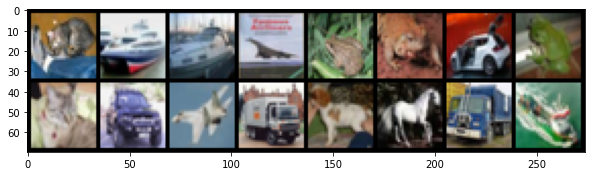

torch.Size([16, 3, 32, 32])
Reconstructed image
torch.Size([16, 3, 32, 32])


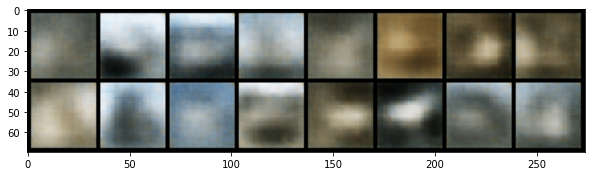

In [16]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images)
print(images.shape)
print("Reconstructed image")
decoded_imgs = model_f(images)[1]
print(decoded_imgs.size())
imshow(torchvision.utils.make_grid(decoded_imgs.data.reshape(16,3,32,32)))

##Convolution layers

In [ ]:
class Autoencoder_(torch.nn.Module):
  def __init__(self):
    super(Autoencoder_,self).__init__()
    self.encoder = torch.nn.Sequential(
        nn.Conv2d(3, 16, 3, stride=1, padding='same'),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride=1),
        nn.Conv2d(16, 8, 3, stride=1, padding='same'),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride=1)
    )
    self.decoder = torch.nn.Sequential(
        nn.ConvTranspose2d(8, 16, 3),
        nn.ReLU(),
        nn.ConvTranspose2d(16, 3, 3,padding=1),
        nn.Sigmoid(),
    )
  def forward(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded,decoded

In [ ]:
model = Autoencoder_()
print_model(model.encoder, model.decoder)
loss_function = torch.nn.BCELoss()
optmizer_ = optim.Adam(model.parameters())


############## Encoder ##############
Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (1): ReLU()
  (2): MaxPool2d(kernel_size=(2, 2), stride=1, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (4): ReLU()
  (5): MaxPool2d(kernel_size=(2, 2), stride=1, padding=0, dilation=1, ceil_mode=False)
)
############## Decoder ##############
Sequential(
  (0): ConvTranspose2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): ConvTranspose2d(16, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): Sigmoid()
)



In [ ]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			# inputs = torch.permute(inputs,(0,2,3,1))
			inputs = Variable(inputs)
			# print("Inputs Shape:",inputs.shape,type(inputs))
			# inputs = inputs.reshape(16,3072)
			# ============ Forward ============
			encoded, outputs = model(inputs)
			# print("Outputs Shape:",outputs.shape,type(outputs))
			loss = loss_function(outputs, inputs)
			# ============ Backward ============
			optmizer_.zero_grad()
			loss.backward()
			optmizer_.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(autoencoder.state_dict(), "autoencoder_cnn.pt")

[1,  2000] loss: 0.554
[2,  2000] loss: 0.551
[3,  2000] loss: 0.550
[4,  2000] loss: 0.550
[5,  2000] loss: 0.550
Finished Training
Saving Model...


GroundTruth:    cat  ship  ship plane  frog


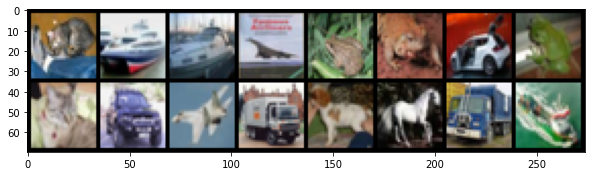

torch.Size([16, 3, 32, 32])
Reconstructed image
torch.Size([16, 3, 32, 32])


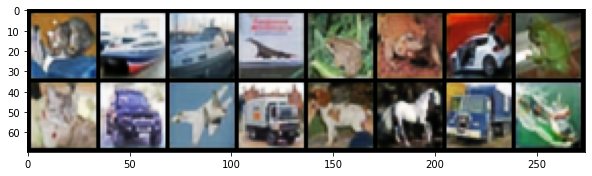

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images)
print(images.shape)
print("Reconstructed image")
decoded_imgs = model(images.reshape(16,3,32,32))[1]
print(decoded_imgs.size())
imshow(torchvision.utils.make_grid(decoded_imgs.data.reshape(16,3,32,32)))

we can see the improvement in reconstruction images.
cnn has better output when compared to cnn+fully connected and cnn+fully connected has better result than Fully connected. 

#### 2.1 What are the Applications of Autoencoders and different types of Autoencoders

>*    The main idea behind the autoencoder is to reduce the dimensionality of the data without loss of original characters of the data.
>*    Consists of encoder,decoder where encoder compresses the input into a latent space representantions(Bottle neck) and decoder if the function to reconstruct the input from the latent space representation.


> Applications of Autoencoders
>>* Dimensionality Reduction
>>> where the size of bottleneck is very much less than input layer, we make the network to learn the important features by reducing the hidden layer size. 
>>* Image Denoising
>>>  we use autoencoders to remove noise from the image. we add noisea and then we pass it through denoising autoencoder to remove noise.
>>* Image Compression
>>* Feature Extraction
>>* Image Generation





####2.2 PCA versus Autoencoders. Give detailed differences between them. (can use equations in latex and figures for the justification).

The main problem we face in machine learning is, data with huge dimensions. If we train a model with large number of parameters then we lead to overfitting and poor generalization. If we can come up with some idea to convert the data in lower dimensional space, then we can get better results.

>The most common ways to reuce the dimensionality are PCA and Autoencoders.
#PCA
* PCA is a linear transformation. We will project the data in to new space, where the vectors of the space are defined by the variance of the data along particular vector. we restrict the dimensionality to some number to achieve dimensionality reduction.
* Features extracted here ar uncorrelated with each other since features are the projections on to the orthogonal basis. 
* Faster when compared with autoencoders and computationally cheaper.
#Auto encoders
* These are Neural Networks that are used to reduce the data into lower dimensions but using non-linear activation functions at every stage.
They are capable of modelling complex non-linear functions.
* Correlation among features may exist, because they are trained over a neural network which we use them for further reconstruction of data.
* Sinlge Layered autoencoder with linear activations is similar to PCA.



